# Algorytmy macierzowe - zadanie nr 1 - Mnożenie macierzy

"2. Proszę napisać mnożenie qxq macierzy FEM i FEM używając algorytmu mnożenia blokowego i dobrać optymalną kolejność pętli oraz rozmiar bloków"

Marcin Hawryluk, Norbert Wolniak <br>grupa: piątek 12:50B <hr>

## Python 3

In [ ]:
import numpy as np
from time import time
import matplotlib.pyplot as plt
import pandas as pd

### Generowanie macierzy

In [2]:
def read_matrix(file_name):
    with open(file_name, 'r') as file:
        for line in file:
            if line.strip() == '':
                continue
            if line[0] == '#':
                if line[2:6] == "rows":
                    _, _, size = line.split()
                    size = int(size)
                    matrix = np.zeros((size, size))
            else:
                row, col, val = line.split(' ')
                matrix[int(row)-1, int(col)-1] = val
            
    return matrix

In [14]:
matrix_small = read_matrix("matrices/fem_1210_16x16.txt")
matrix_small

array([[0.11111111, 0.05555556, 0.        , 0.        , 0.05555556,
        0.02777778, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.11111111, 0.        , 0.        , 0.02777778,
        0.05555556, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.11111111, 0.05555556, 0.        ,
        0.        , 0.05555556, 0.02777778, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.05555556, 0.11111111, 0.        ,
        0.        , 0.02777778, 0.05555556, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.05555556, 0.02777778, 0.        , 0.        , 0.11111111,
        0.05555556, 0.        , 

### Procedura mnożenia macierzy

#### Klasyczna funkcja  w 6 wersjach

In [4]:
def mm_ijp(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for i in range(m):
        for j in range(k):
            for p in range(n):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

def mm_ipj(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for i in range(m):
        for p in range(n):
            for j in range(k):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

def mm_jip(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for j in range(k):
        for i in range(m):
            for p in range(n):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

def mm_jpi(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for j in range(k):
        for p in range(n):
            for i in range(m):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

def mm_pij(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for p in range(n):
        for i in range(m):
            for j in range(k):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

def mm_pji(matrix_a, matrix_b):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k), dtype=np.float64)
    for p in range(n):
        for j in range(k):
            for i in range(m):
                matrix_c[i, j] += matrix_a[i, p] * matrix_b[p, j]
    return matrix_c

In [5]:
def mm_test(matrix_a, matrix_b):
    matrix_c = matrix_a @ matrix_b
    res = True
    for mm in [mm_ijp, mm_ipj, mm_jip, mm_jpi, mm_pij, mm_pji]:
        if not np.allclose(matrix_c, mm(matrix_a, matrix_b)):
            print("{} not correct!".format(mm.__name__))
            res = False
    if res:
        print("OK")

mm_test(matrix_small, matrix_small)

OK


#### Procedura mnożenia blokowego macierzy

In [6]:
def mm_block(matrix_a, matrix_b, block_size):
    (m, n), k = matrix_a.shape, matrix_b.shape[1]
    matrix_c = np.zeros((m, k))
    
    for i in range(0, m, block_size):
        ib = min(m - i, block_size)
        for j in range(0, k, block_size):
            jb = min(n - j, block_size)
            for p in range(0, n, block_size):
                pb = min(k - p, block_size)
                matrix_c[i:i+ib, j:j+jb] += mm_ijp(matrix_a[i:i+ib, p:p+pb],
                                                                   matrix_b[p:p+pb, j:j+jb])
    return matrix_c

In [7]:
def mm_block_test(matrix_a, matrix_b):
    matrix_c = matrix_a @ matrix_b
    res = True
    for block_size in range(1, 20):
        if not np.allclose(matrix_c, mm_block(matrix_a, matrix_b, block_size)):
            print("{} incorrect block size!".format(block_size))
            res = False
    if res:
        print("OK")

mm_block_test(matrix_small, matrix_small)

OK


"1. Proszę wybrać dwie możliwie największe macierze A i B ze swoich dwóch rodzin macierzy, takie żeby zgadzały się ich rozmiary, oraz przemnożyć je A*B swoim optymalnym algorytmem (tak duże macierze jakie da się w czasie kilku-kilkudziesięciu minut przemnożyć na Państwa laptopie)"

In [8]:
matrix = read_matrix("matrices/fem_1550_196x196.txt")
print(matrix.shape)

(196, 196)


"2. Proszę narysować schemat niezerowych wartości swoich dwóch macierzy (używając komendy spy(A), spy(B) MATLABa) oraz macierzy wynikowej A*B"

<img src="matrices/1550_spy.jpeg" width=500 height=500 />
<img src="matrices/1550_spy_mult.jpeg" width=500 height=500 />

### Pomiar czasów

"3. Proszę zmierzyć czas mnożenia tych wybranych dwóch dużych macierzy dla różnej kolejności pętli w algorytmie mnożenia macierzy. Proszę narysować tabelkę: kolejność pętli (6 możliwości) versus czasy mnożenia"

In [7]:
def compare_mult_times(matrix_a, matrix_b):
    times = {}
    for mm in [mm_ijp, mm_ipj, mm_jip, mm_jpi, mm_pij, mm_pji]:
        start = time()
        mm(matrix_a, matrix_b)
        times[mm.__name__[3:]] = time() - start
        
    df = pd.DataFrame(times.values(), times.keys(), ["times [s]"])
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.set_xlabel('loop order')
    ax.set_ylabel('multiplication time [s]')
    ax.bar(times.keys(), times.values(), color="#4a4e69")
    
    return df

,times [s]
ijp,3.225448
ipj,3.183347
jip,3.194290
jpi,3.248986
pij,3.198173
pji,3.211180


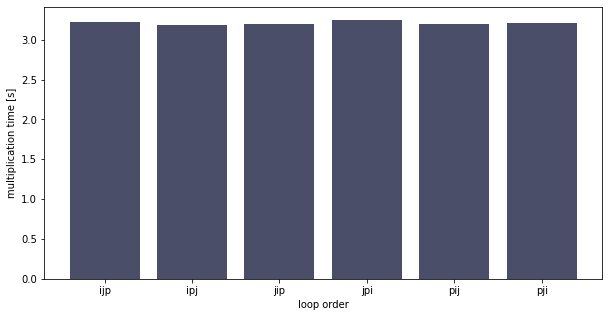

In [10]:
compare_mult_times(matrix, matrix)

"4. Proszę wybrać jedną kolejność pętli i następnie dla swoich dwóch macierzy A i B zmierzyć czasy mnożenia w algorytmie mnożenia blokowego. Proszę narysować wykres: oś x rozmiar bloków, oś y czas mnożenia"

In [11]:
def compare_block_times(matrix_a, matrix_b):
    times = {}
    
    for block_size in range(1, 100, 5):
        start = time()
        mm_block(matrix_a, matrix_b, block_size)
        times[block_size] = time() - start
    
    df = pd.DataFrame(times.values(), times.keys(), ["times [s]"])
    
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_xlabel('block size')
    ax.set_ylabel('multiplication time [s]')
    ax.plot(times.keys(), times.values(), color="#4a4e69")
    
    return df

,times [s]
1,28.130080
6,3.465760
11,3.232680
16,3.366997
21,3.194031
26,3.208124
31,3.303492
36,3.310756
41,3.245519
46,3.256864


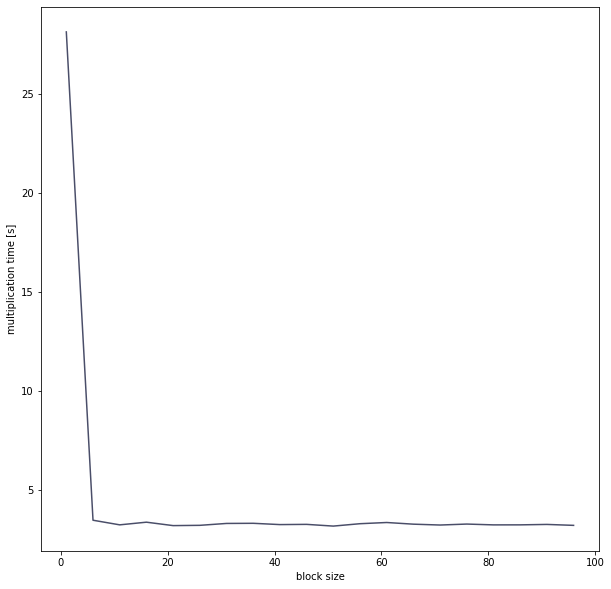

In [12]:
compare_block_times(matrix, matrix)

<hr>

## C

### Generowanie macierzy

```c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>
#include <sys/times.h>
#include <string.h>

double** read_matrix(char* filename, int m){
    FILE* f;
    f = fopen(filename, "r");

    char * buffer = NULL;
    size_t len = 0;
    ssize_t read;
    int n;
    double ** matrix;

    while ((read = getline(&buffer, &len, f)) != -1) {
        char *token;
        token = strtok(buffer, " ");
   
        if(strcmp(token, "#") == 0){
            token = strtok(NULL, " ");
            if(strcmp(token, "rows:") == 0){
                token = strtok(NULL, " ");
                n = atoi(token);
                matrix = empty_arr(n * m, n * m);
            }
        }
        else{
            int i, j;
            double val;
            i = atoi(token);
            token = strtok(NULL, " ");
            j = atoi(token);
            token = strtok(NULL, " ");
            val = atof(token);
            matrix[i-1][j-1] = val;
        }
    }  

    for (int i = n ; i < n * m ; i++)
    {
        for (int j = n ; j < n * m ; j++)
        {
            matrix[i][j] = matrix[i%n][j%n];
        }
    }

    fclose(f);
    return matrix;
}
```

### Procedura mnożenia macierzy

#### Klasyczna funkcja w 6 wersjach

```c
void matmul_ijp(double** C, double** A, double** B, int n){
    for (int i = 0 ; i < n ; i++){
        for (int j = 0 ; j < n ; j++){
            for (int p = 0 ; p < n ; p++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}

void matmul_ipj(double** C, double** A, double** B, int n){
    for (int i = 0 ; i < n ; i++){
        for (int p = 0 ; p < n ; p++){
            for (int j = 0 ; j < n ; j++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}

void matmul_jip(double** C, double** A, double** B, int n){
    for (int j = 0 ; j < n ; j++){
        for (int i = 0 ; i < n ; i++){
            for (int p = 0 ; p < n ; p++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}

void matmul_jpi(double** C, double** A, double** B, int n){
    for (int j = 0 ; j < n ; j++){
        for (int p = 0 ; p < n ; p++){
            for (int i = 0 ; i < n ; i++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}

void matmul_pij(double** C, double** A, double** B, int n){
    for (int p = 0 ; p < n ; p++){
        for (int i = 0 ; i < n ; i++){
            for (int j = 0 ; j < n ; j++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}

void matmul_pji(double** C, double** A, double** B, int n){
    for (int p = 0 ; p < n ; p++){
        for (int j = 0 ; j < n ; j++){
            for (int i = 0 ; i < n ; i++){
                C[i][j] = C[i][j] + A[i][p] * B[p][j];
            }
        }
    }
}
```

#### Procedura mnożenia blokowego macierzy

```c
void matmul_blocking(double** C, double** A, double** B, int n, int block_size){
    for (int i = 0 ; i < n ; i=i+block_size){
        for (int p = 0 ; p < n ; p=p+block_size){
            for (int j = 0 ; j < n ; j=j+block_size){

                for (int ib = i ; ib < i + block_size ; ib++){
                    for (int pb = p ; pb < p + block_size ; pb++){
                        for (int jb = j ; jb < j + block_size ; jb++){
                            C[ib][jb] = C[ib][jb] + A[ib][pb] * B[pb][jb];
                        }
                    }
                }
            }
        }
    }
}
```

### Pomiar czasów

```c
int main()
{
    srand ( time ( NULL));
    clock_t start, end;

    double* ijp_times = malloc(1 * sizeof(double));
    double* ipj_times = malloc(1 * sizeof(double));
    double* jip_times = malloc(1 * sizeof(double));
    double* jpi_times = malloc(1 * sizeof(double));
    double* pij_times = malloc(1 * sizeof(double));
    double* pji_times = malloc(1 * sizeof(double));
    double* blocking_times = malloc(200 * sizeof(double));

    int multipl = 10;
    double** A = read_matrix("fem_1550_196x196.txt", multipl);
    double** B = read_matrix("fem_1550_196x196.txt", multipl);
    double** C;
    int n = 196 * multipl;
    
    
    printf("size %d\n", n);
    C = empty_arr(n, n);
    start = clock();
    matmul_ijp(C, A, B, n);
    end = clock();
    ijp_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    printf("%f\n", ijp_times[0]);

    remove_arr(n, C);

    C = empty_arr(n, n);
    start = clock();
    matmul_ipj(C, A, B, n);
    end = clock();
    ipj_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    remove_arr(n, C);

    C = empty_arr(n, n);
    start = clock();
    matmul_jip(C, A, B, n);
    end = clock();
    jip_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    remove_arr(n, C);

    C = empty_arr(n, n);
    start = clock();
    matmul_jpi(C, A, B, n);
    end = clock();
    jpi_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    remove_arr(n, C);

    C = empty_arr(n, n);
    start = clock();
    matmul_pij(C, A, B, n);
    end = clock();
    pij_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    remove_arr(n, C);

    C = empty_arr(n, n);
    start = clock();
    matmul_pji(C, A, B, n);
    end = clock();
    pji_times[0] = ((double)(end - start)) / CLOCKS_PER_SEC;
    remove_arr(n, C);
    

    int k = 0;
    for (int block_size = 1 ; block_size <= n ; block_size = block_size + 1){
        if (n % block_size != 0) continue;
        printf("block size %d\n", block_size);
        
        C = empty_arr(n, n);
        start = clock();
        matmul_blocking(C, A, B, n, block_size);
        end = clock();
        blocking_times[k] = ((double)(end - start)) / CLOCKS_PER_SEC;
        remove_arr(n, C);
        k++;
    }

    remove_arr(n,A);
    remove_arr(n,B);

    FILE *f_matmul;
    f_matmul = fopen("matmul_times.csv", "w+");
    fprintf(f_matmul,"Size, IJP, IPJ, JIP, JPI, PIJ, PJI\n");
    fprintf(f_matmul,"%d, %f, %f, %f, %f, %f, %f\n", n, ijp_times[0], ipj_times[0],
            jip_times[0], jpi_times[0], pij_times[0], pji_times[0]);


    FILE *f_blocking;
    f_blocking = fopen("blocking_times.csv", "w+");
    fprintf(f_blocking,"BlockSize, Time[s]\n");
    k = 0;
    for (int block_size = 1 ; block_size <= n ; block_size++){
        if (n % block_size != 0) continue;
        fprintf(f_blocking,"%d, %f\n", block_size, blocking_times[k]);
        k++;
    }

    fclose(f_matmul);
    fclose(f_blocking);
    free(ijp_times);
    free(ipj_times);
    free(jip_times);
    free(jpi_times);
    free(pij_times);
    free(pji_times);
    free(blocking_times);
    return 0;
}
```

## Liczba operacji zmiennoprzecinkowych

"5. Proszę obliczyć liczbę operacji zmienno-przecinkowych koniecznych do przemnożenia swoich dwóch macierzy"

Aby przemnożyć obie macierze A i B o wymiarach nxn każda potrzeba 2 * n^3 operacji zmiennoprzecinkowych, 
w ogólności dla macierzy n x m * m x k potrzeba 2 * n * m * k operacji, ponieważ w celu obliczenia wartości w macierzy wynikowej musimy wykonać m mnożeń oraz m dodawań, a komórek jest n*k. Wykorzystując procedurę mnożenia blokowego, nie zmienia się łączna liczba operacji.

## Wnioski

* 
* 
* 


M. Hawryluk, N. Wolniak. 2021